# Cryptocurrency Ratios Analysis

## Overview
This notebook performs a comprehensive analysis of cryptocurrency price ratios to understand relative performance and market relationships between major digital assets. By calculating and visualizing price ratios, we can identify trends, correlations, and potential trading opportunities in the cryptocurrency market.

## Methodology

### Data Source
- **Historical Price Data**: Retrieved from Yahoo Finance API (yfinance)
- **Time Period**: January 2020 to present
- **Cryptocurrencies Analyzed**: BTC, ETH, BNB, DOGE, LINK, SOL, ADA, XRP, LTC, CRO
- **Data Frequency**: Daily closing prices

### Ratio Calculations
The analysis focuses on key cryptocurrency pairs to understand:
- **Bitcoin-based ratios**: How altcoins perform relative to Bitcoin (the market leader)
- **Ethereum-based ratios**: How selected altcoins perform relative to Ethereum (the second-largest crypto)
- **Cross-altcoin relationships**: Direct comparisons between major altcoins

### Ratios Analyzed
1. **Bitcoin Pairs**: ETH/BTC, BNB/BTC, DOGE/BTC, SOL/BTC, ADA/BTC, XRP/BTC, LTC/BTC, CRO/BTC, LINK/BTC
2. **Ethereum Pairs**: SOL/ETH, LINK/ETH

## Key Insights

### Market Relationships
- **ETH/BTC Ratio**: Shows Ethereum's performance relative to Bitcoin, indicating market sentiment shifts
- **Altcoin/BTC Ratios**: Reveal which altcoins outperform or underperform Bitcoin during different market cycles
- **Altcoin/ETH Ratios**: Provide insights into newer assets' performance against established cryptocurrencies

### Trading Implications
- **Ratio Analysis Benefits**:
  - Identifies relative strength and weakness between cryptocurrencies
  - Helps in portfolio rebalancing decisions
  - Reveals market rotation patterns between different crypto sectors
  - Assists in pair trading strategies

### Data Quality Considerations
- **SOL Data**: Solana (SOL) has limited historical data as it's newer than other cryptocurrencies
- **Missing Data Handling**: Zero-filled approach for visualization (noted limitation)
- **Volatility**: Cryptocurrency ratios exhibit high volatility, requiring careful interpretation

## Visualization Approach
The notebook provides dual visualization methods:
1. **Interactive Plotly Charts**: Detailed subplot analysis with hover capabilities
2. **Static Matplotlib Charts**: Professional publication-ready visualizations with summary statistics

## Applications
This analysis is valuable for:
- **Portfolio Management**: Understanding relative performance for asset allocation
- **Market Analysis**: Identifying trends and cycles in cryptocurrency relationships
- **Risk Assessment**: Evaluating correlation patterns between digital assets
- **Educational Purposes**: Learning about cryptocurrency market dynamics

---

*Disclaimer: This analysis is for educational and research purposes only. Cryptocurrency investments carry significant risk, and past performance does not guarantee future results. Always conduct your own research and consider consulting with financial advisors before making investment decisions.*

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [2]:
# portfolio of crypto
crypto = ['BNB-USD', 'ETH-USD', 'BTC-USD', 'DOGE-USD', 'LINK-USD', 'SOL-USD', 'ADA-USD', 'XRP-USD', 'LTC-USD', 'CRO-USD', 'PENGU34466-USD', 'DOOD-USD', 'CAKE-USD']

In [3]:
# import yfinance as yf

# start_date = "2020-01-01"
# end_date = datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(crypto, start=start_date, end=end_date, group_by='ticker')

# # download data to csv
# data.to_csv("crypto.csv")

In [4]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("crypto.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Forward fill missing values for each column
df = df.fillna(method='ffill')

# Convert all values to float
df = df.astype(float)

# rename tickers to more readable names
df.columns = pd.MultiIndex.from_tuples([
    (
        col[0].replace('BNB-USD', 'BNB')
        .replace('ETH-USD', 'ETH')
        .replace('BTC-USD', 'BTC')
        .replace('DOGE-USD', 'DOGE')
        .replace('LINK-USD', 'LINK')
        .replace('SOL-USD', 'SOL')
        .replace('ADA-USD', 'ADA')
        .replace('XRP-USD', 'XRP')
        .replace('LTC-USD', 'LTC')
        .replace('CRO-USD', 'CRO')
        .replace('PENGU34466-USD', 'PENGU')
        .replace('DOOD-USD', 'DOOD')
        .replace('CAKE-USD', 'CAKE'),
        col[1]
    ) for col in df.columns
])


# Show the result
# df.head()

In [5]:
# keep only 'Close' from MultiIndex Level 1
close_prices = df.xs('Close', level=1, axis=1)

# date index to datetime
close_prices.index = pd.to_datetime(close_prices.index)

# Show the result
close_prices.head()


,BNB,BTC,SOL,LINK,XRP,PENGU,ETH,DOOD,CRO,LTC,CAKE,DOGE,ADA
Date,,,,,,,,,,,,,
2020-01-01,13.689083,7200.174316,NaN,1.806640,0.192667,NaN,130.802002,NaN,0.033973,42.017719,NaN,0.002033,0.033458
2020-01-02,13.027011,6985.470215,NaN,1.741144,0.188043,NaN,127.410179,NaN,0.032858,39.823013,NaN,0.002009,0.032751
2020-01-03,13.660452,7344.884277,NaN,1.809708,0.193521,NaN,134.171707,NaN,0.034666,42.415573,NaN,0.002145,0.034180
2020-01-04,13.891512,7410.656738,NaN,1.840133,0.194355,NaN,135.069366,NaN,0.034689,43.326607,NaN,0.002241,0.034595
2020-01-05,14.111019,7411.317383,NaN,1.807787,0.195537,NaN,136.276779,NaN,0.034618,43.553207,NaN,0.002419,0.034721


In [6]:
# crypto ratios list
ratios_list = ['ETH/BTC', 'BNB/BTC', 'DOGE/BTC', 
               'SOL/BTC', 'ADA/BTC', 'XRP/BTC', 
               'LTC/BTC', 'CRO/BTC', 'LINK/BTC', 
               'SOL/ETH', 'LINK/ETH', 'CAKE/BNB',
               'PENGU/SOL', 'DOOD/SOL', 'DOOD/PENGU'
               ]

In [7]:
# create ratios DataFrame
ratios_df = pd.DataFrame(index=close_prices.index)

# Calculate the price ratios for each pair in the ratios list
for pair in ratios_list:
    base, quote = pair.split('/')
    ratios_df[pair] = close_prices[base] / close_prices[quote]

# fill any NaN values with 0 (zero)
"""
Although this is not the proper solution, it is a quick fix to avoid issues with NaN values, 
especially for SOL, that is more recent than the other cryptos.
"""
ratios_df = ratios_df.fillna(0)

# Show the result
ratios_df.head()

,ETH/BTC,BNB/BTC,DOGE/BTC,SOL/BTC,ADA/BTC,XRP/BTC,LTC/BTC,CRO/BTC,LINK/BTC,SOL/ETH,LINK/ETH,CAKE/BNB,PENGU/SOL,DOOD/SOL,DOOD/PENGU
Date,,,,,,,,,,,,,,,
2020-01-01,0.018167,0.001901,2.823543e-07,0.0,0.000005,0.000027,0.005836,0.000005,0.000251,0.0,0.013812,0.0,0.0,0.0,0.0
2020-01-02,0.018239,0.001865,2.875970e-07,0.0,0.000005,0.000027,0.005701,0.000005,0.000249,0.0,0.013666,0.0,0.0,0.0,0.0
2020-01-03,0.018267,0.001860,2.920400e-07,0.0,0.000005,0.000026,0.005775,0.000005,0.000246,0.0,0.013488,0.0,0.0,0.0,0.0
2020-01-04,0.018226,0.001875,3.024024e-07,0.0,0.000005,0.000026,0.005847,0.000005,0.000248,0.0,0.013624,0.0,0.0,0.0,0.0
2020-01-05,0.018388,0.001904,3.263927e-07,0.0,0.000005,0.000026,0.005877,0.000005,0.000244,0.0,0.013266,0.0,0.0,0.0,0.0


In [8]:
# plot ratios for each pair in the ratios list using subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate number of rows and columns for subplots
n_ratios = len(ratios_list)
n_cols = 3  # 3 columns
n_rows = (n_ratios + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=[f'{ratio}' for ratio in ratios_list],
    vertical_spacing=0.08,
    horizontal_spacing=0.05
)

# Add each ratio as a separate subplot
for i, ratio in enumerate(ratios_list):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1
    
    fig.add_trace(
        go.Scatter(
            x=ratios_df.index,
            y=ratios_df[ratio],
            mode='lines',
            name=ratio,
            line=dict(width=2),
            showlegend=False
        ),
        row=row, col=col
    )
    
    # Update y-axis title for each subplot
    fig.update_yaxes(title_text="Ratio", row=row, col=col)
    fig.update_xaxes(title_text="Date", row=row, col=col)

# Update layout
fig.update_layout(
    title_text="Cryptocurrency Ratios - Individual Analysis",
    title_x=0.5,
    height=300 * n_rows,  # Adjust height based on number of rows
    showlegend=False
)

fig.show()

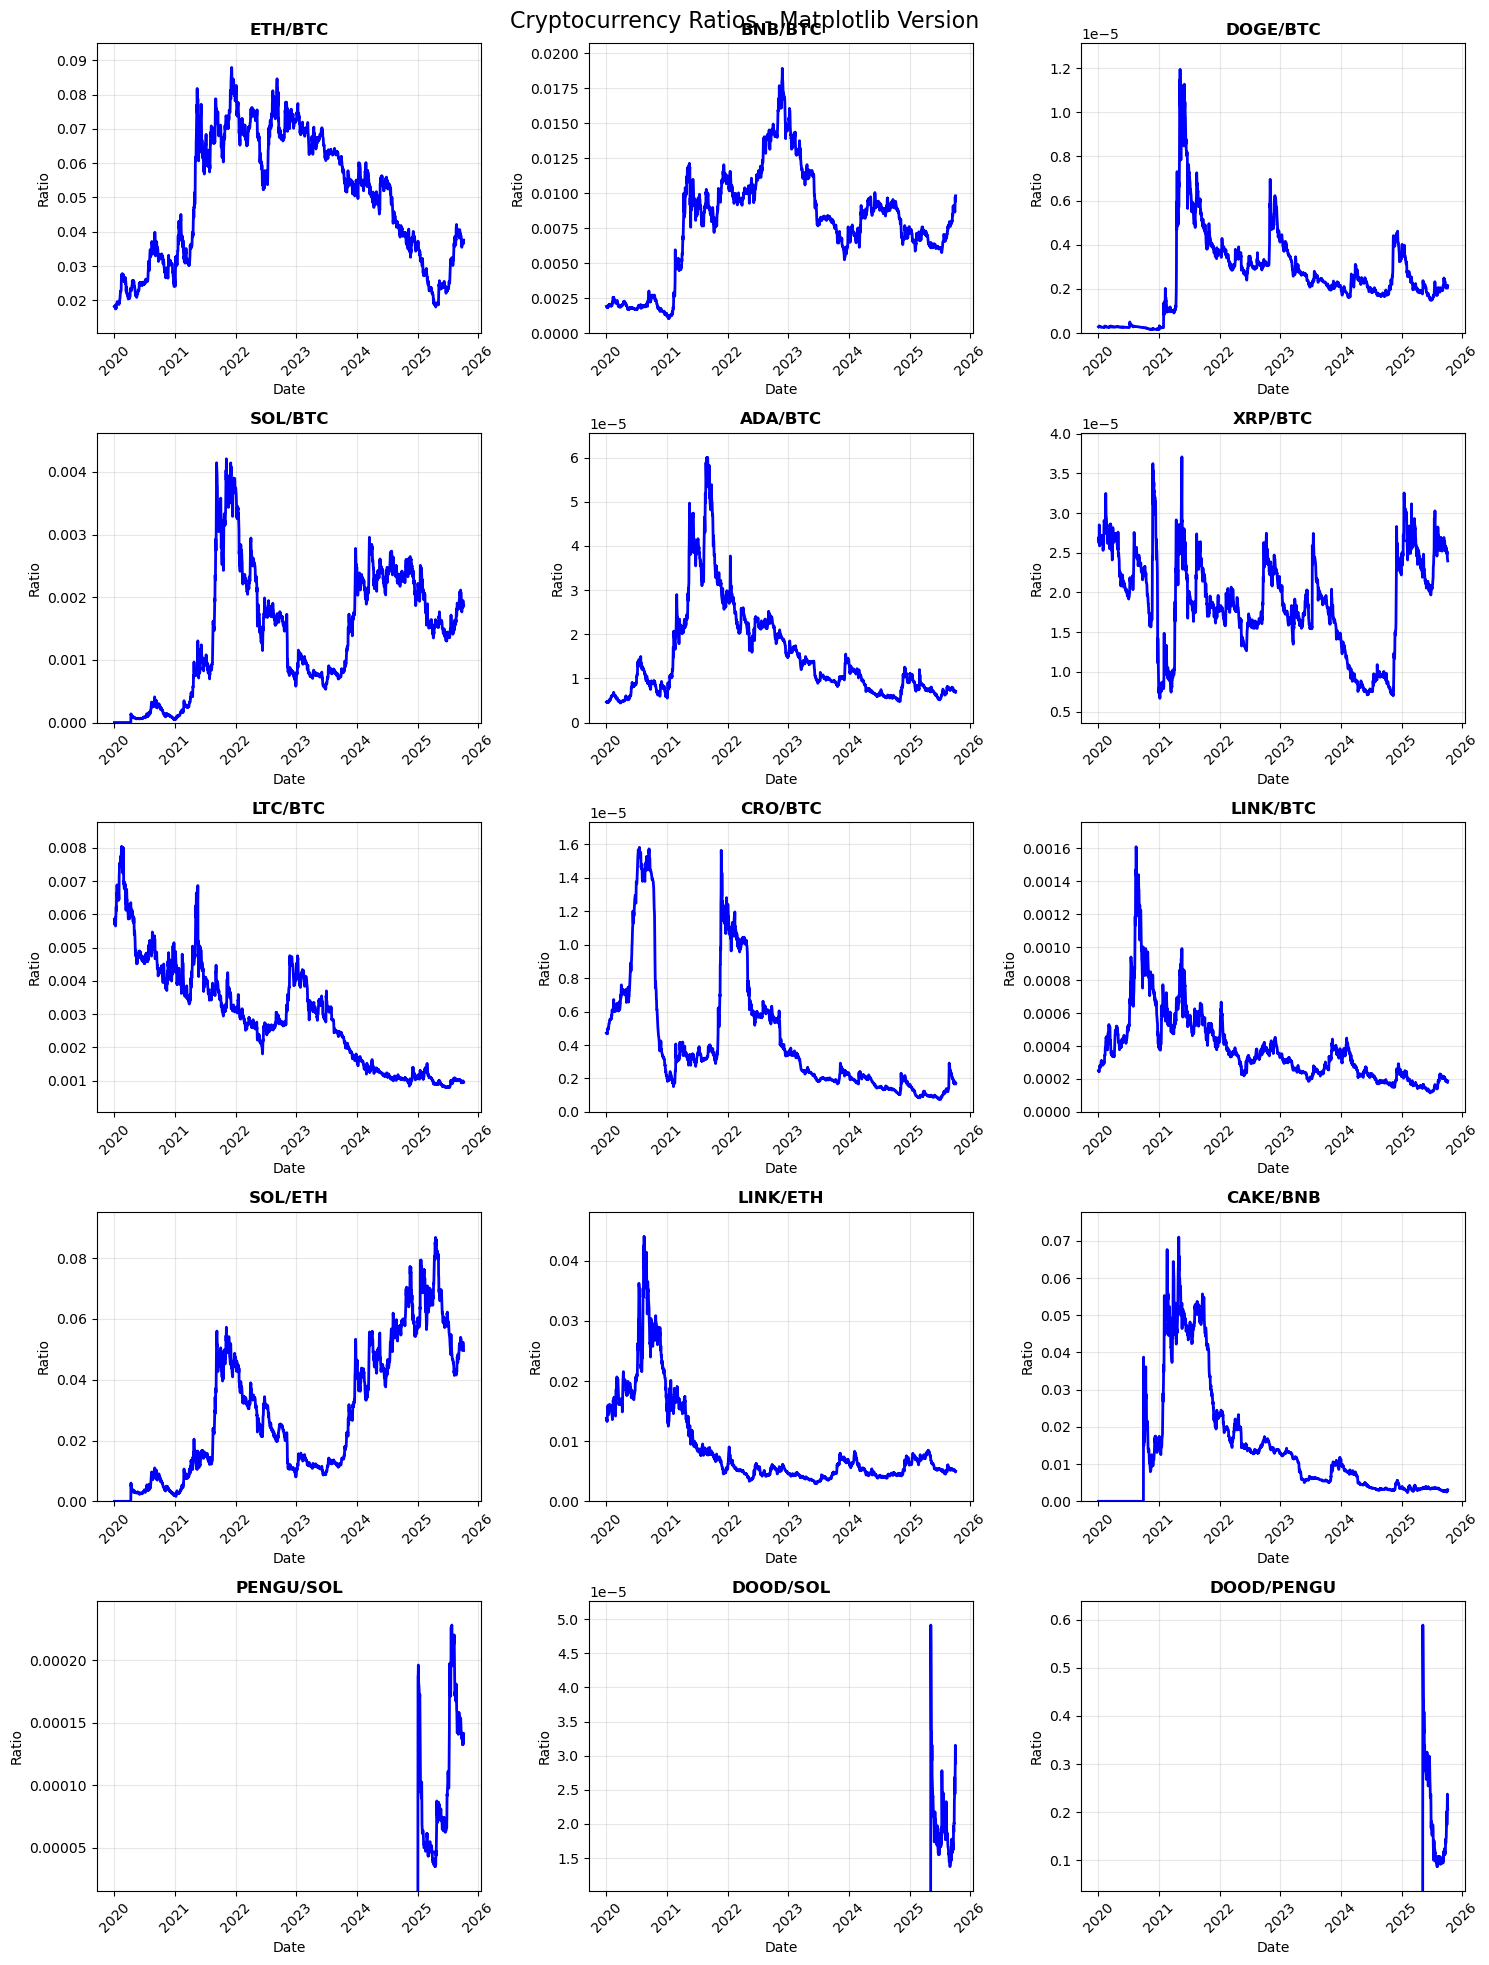


Cryptocurrency Ratios Summary Statistics:
   ETH/BTC: Mean=0.0499, Std=0.0188, Min=0.0175, Max=0.0879
   BNB/BTC: Mean=0.0079, Std=0.0038, Min=0.0010, Max=0.0189
  DOGE/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0000
   SOL/BTC: Mean=0.0015, Std=0.0010, Min=0.0000, Max=0.0042
   ADA/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0001
   XRP/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0000
   LTC/BTC: Mean=0.0030, Std=0.0016, Min=0.0008, Max=0.0080
   CRO/BTC: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0000
  LINK/BTC: Mean=0.0004, Std=0.0002, Min=0.0001, Max=0.0016
   SOL/ETH: Mean=0.0305, Std=0.0217, Min=0.0016, Max=0.0868
  LINK/ETH: Mean=0.0092, Std=0.0074, Min=0.0029, Max=0.0441
  CAKE/BNB: Mean=0.0157, Std=0.0154, Min=0.0024, Max=0.0710
 PENGU/SOL: Mean=0.0001, Std=0.0001, Min=0.0000, Max=0.0002
  DOOD/SOL: Mean=0.0000, Std=0.0000, Min=0.0000, Max=0.0000
DOOD/PENGU: Mean=0.1856, Std=0.1029, Min=0.0866, Max=0.5890


In [9]:
# Alternative matplotlib visualization of cryptocurrency ratios

# Create subplots using matplotlib
n_ratios = len(ratios_list)
n_cols = 3
n_rows = (n_ratios + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Cryptocurrency Ratios - Matplotlib Version', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

# Plot each ratio
for i, ratio in enumerate(ratios_list):
    if i < len(axes):
        axes[i].plot(ratios_df.index, ratios_df[ratio], linewidth=2, color='blue')
        axes[i].set_title(f'{ratio}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Ratio')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Remove zero values from y-axis display for better scaling
        non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
        if not non_zero_data.empty:
            y_min, y_max = non_zero_data.min(), non_zero_data.max()
            margin = (y_max - y_min) * 0.1
            axes[i].set_ylim(max(0, y_min - margin), y_max + margin)

# Hide any unused subplots
for i in range(len(ratios_list), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nCryptocurrency Ratios Summary Statistics:")
print("=" * 50)
for ratio in ratios_list:
    non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
    if not non_zero_data.empty:
        print(f"{ratio:>10}: Mean={non_zero_data.mean():.4f}, "
              f"Std={non_zero_data.std():.4f}, "
              f"Min={non_zero_data.min():.4f}, "
              f"Max={non_zero_data.max():.4f}")
    else:
        print(f"{ratio:>10}: No valid data available")

In [10]:
# ratios_2017_list
ratios_2017_list = ['ETH/BTC', 'DOGE/BTC','ADA/BTC', 'XRP/BTC', 'LTC/BTC']

[*********************100%***********************]  6 of 6 completed


Data loaded successfully. Date range: 2017-11-09 00:00:00 to 2025-10-06 00:00:00
Available cryptocurrencies: ['BTC', 'LTC', 'ETH', 'DOGE', 'ADA', 'XRP']
Calculated ratio: ETH/BTC
Calculated ratio: DOGE/BTC
Calculated ratio: ADA/BTC
Calculated ratio: XRP/BTC
Calculated ratio: LTC/BTC

Ratios calculated: ['ETH/BTC', 'DOGE/BTC', 'ADA/BTC', 'XRP/BTC', 'LTC/BTC']
Data points per ratio: 2889


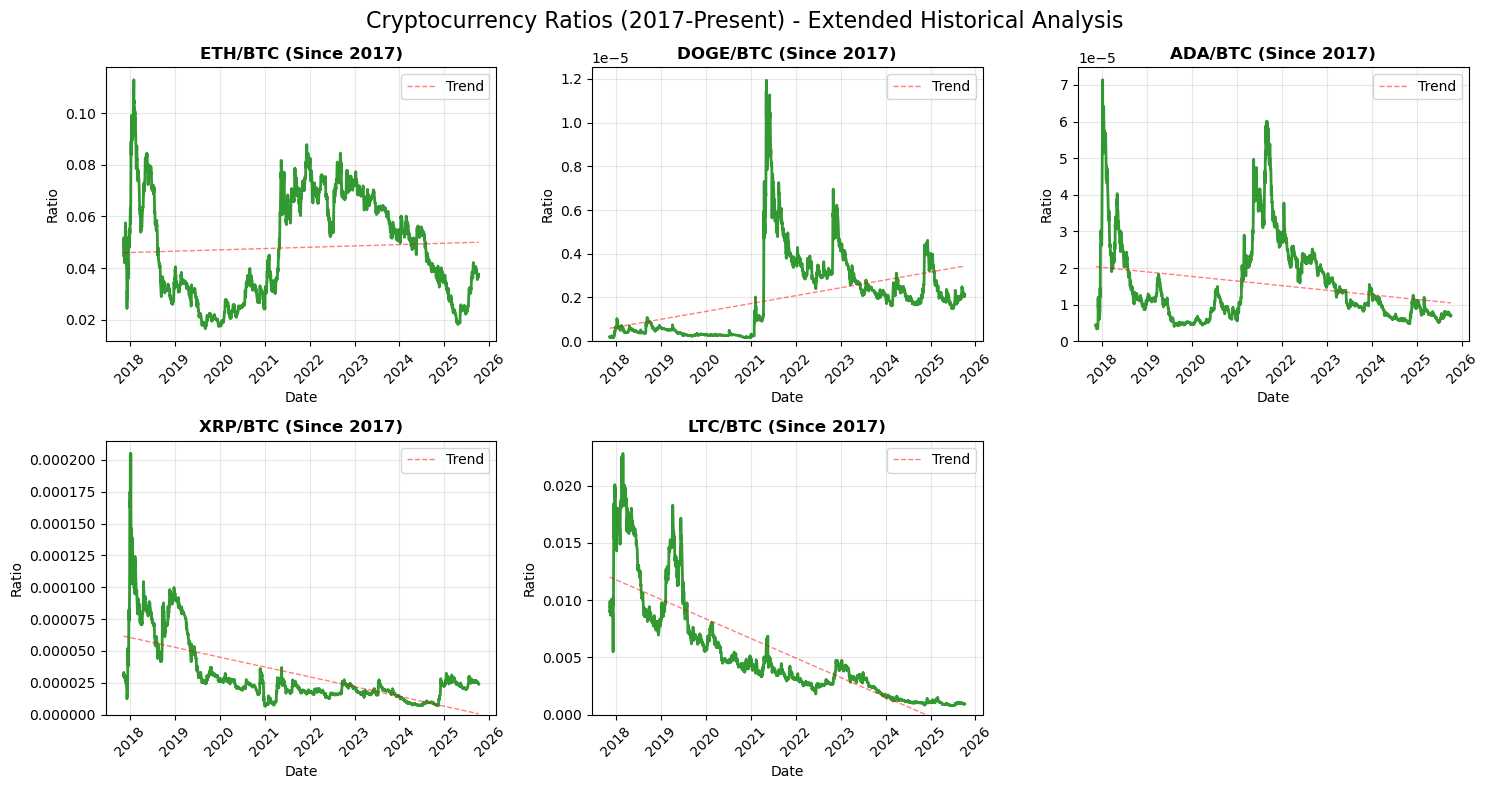


CRYPTOCURRENCY RATIOS EXTENDED ANALYSIS (2017-PRESENT)

ETH/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-10-06
  Data Points: 2889
  Mean Ratio: 0.0480
  Std Deviation: 0.0202
  Min Ratio: 0.0164 (on 2019-09-06)
  Max Ratio: 0.1131 (on 2018-02-01)
  Total Return: -16.35%
  Avg Yearly Return: 15.53%
  Volatility (Annualized): 0.3865

DOGE/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-10-06
  Data Points: 2889
  Mean Ratio: 0.0000
  Std Deviation: 0.0000
  Min Ratio: 0.0000 (on 2017-12-07)
  Max Ratio: 0.0000 (on 2021-05-07)
  Total Return: 977.71%
  Avg Yearly Return: 243.79%
  Volatility (Annualized): 0.0000

ADA/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-10-06
  Data Points: 2889
  Mean Ratio: 0.0000
  Std Deviation: 0.0000
  Min Ratio: 0.0000 (on 2017-11-17)
  Max Ratio: 0.0001 (on 2018-01-04)
  Total Return: 55.75%
  Avg Yearly Return: 151.57%
  Volatility (Annualized): 0.0002

XRP/BTC ANALYSIS:
  Total Period: 2017-11-09 to 2025-10-06
  Data Points: 2889
  Mean Ratio:

In [11]:
# Extended analysis: Cryptocurrency ratios from 2017 using matplotlib
import yfinance as yf

# Download data from 2017 for selected ratios
start_date_2017 = "2017-01-01"
end_date_2017 = datetime.now().strftime("%Y-%m-%d")

# Cryptocurrencies available from 2017
crypto_2017 = ['ETH-USD', 'BTC-USD', 'DOGE-USD', 'ADA-USD', 'XRP-USD', 'LTC-USD']

print("Downloading historical data from 2017...")
data_2017 = yf.download(crypto_2017, start=start_date_2017, end=end_date_2017, group_by='ticker')

# Process the 2017 data
df_2017 = data_2017.copy()

# Convert to MultiIndex format if needed
if isinstance(df_2017.columns, pd.MultiIndex):
    # Rename tickers to cleaner names
    df_2017.columns = pd.MultiIndex.from_tuples([
        (
            col[0].replace('ETH-USD', 'ETH').replace('BTC-USD', 'BTC').replace('DOGE-USD', 'DOGE').replace('ADA-USD', 'ADA').replace('XRP-USD', 'XRP').replace('LTC-USD', 'LTC'),
            col[1]
        ) for col in df_2017.columns
    ])
    
    # Keep only 'Close' prices
    close_prices_2017 = df_2017.xs('Close', level=1, axis=1)
else:
    # Handle single asset case
    close_prices_2017 = df_2017[['Close']].copy()

# Ensure datetime index
close_prices_2017.index = pd.to_datetime(close_prices_2017.index)

# Forward fill missing values
close_prices_2017 = close_prices_2017.fillna(method='ffill').dropna()

print(f"Data loaded successfully. Date range: {close_prices_2017.index.min()} to {close_prices_2017.index.max()}")
print(f"Available cryptocurrencies: {list(close_prices_2017.columns)}")

# Calculate ratios for 2017 data
ratios_df_2017 = pd.DataFrame(index=close_prices_2017.index)

# Calculate the price ratios for each pair in the 2017 ratios list
for pair in ratios_2017_list:
    base, quote = pair.split('/')
    if base in close_prices_2017.columns and quote in close_prices_2017.columns:
        ratios_df_2017[pair] = close_prices_2017[base] / close_prices_2017[quote]
        print(f"Calculated ratio: {pair}")
    else:
        print(f"Skipping {pair} - missing data for {base} or {quote}")

# Remove any remaining NaN values
ratios_df_2017 = ratios_df_2017.dropna()

print(f"\nRatios calculated: {list(ratios_df_2017.columns)}")
print(f"Data points per ratio: {len(ratios_df_2017)}")

# Create matplotlib visualization for 2017 data
n_ratios_2017 = len(ratios_df_2017.columns)
n_cols = 3
n_rows = (n_ratios_2017 + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Cryptocurrency Ratios (2017-Present) - Extended Historical Analysis', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

# Plot each ratio from 2017
for i, ratio in enumerate(ratios_df_2017.columns):
    if i < len(axes):
        axes[i].plot(ratios_df_2017.index, ratios_df_2017[ratio], linewidth=2, color='green', alpha=0.8)
        axes[i].set_title(f'{ratio} (Since 2017)', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Ratio')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Improve y-axis scaling
        y_min, y_max = ratios_df_2017[ratio].min(), ratios_df_2017[ratio].max()
        margin = (y_max - y_min) * 0.05
        axes[i].set_ylim(max(0, y_min - margin), y_max + margin)
        
        # Add trend line
        x_numeric = np.arange(len(ratios_df_2017))
        z = np.polyfit(x_numeric, ratios_df_2017[ratio], 1)
        p = np.poly1d(z)
        axes[i].plot(ratios_df_2017.index, p(x_numeric), "r--", alpha=0.5, linewidth=1, label='Trend')
        axes[i].legend()

# Hide any unused subplots
for i in range(n_ratios_2017, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Extended summary statistics for 2017 data
print("\n" + "="*70)
print("CRYPTOCURRENCY RATIOS EXTENDED ANALYSIS (2017-PRESENT)")
print("="*70)

for ratio in ratios_df_2017.columns:
    data = ratios_df_2017[ratio]
    
    # Calculate additional statistics
    start_value = data.iloc[0]
    end_value = data.iloc[-1]
    total_return = ((end_value - start_value) / start_value) * 100
    
    # Calculate yearly returns
    years = data.index.year.unique()
    yearly_returns = []
    for year in sorted(years)[:-1]:  # Exclude current incomplete year
        year_start = data[data.index.year == year].iloc[0]
        year_end = data[data.index.year == year].iloc[-1]
        yearly_return = ((year_end - year_start) / year_start) * 100
        yearly_returns.append(yearly_return)
    
    avg_yearly_return = np.mean(yearly_returns) if yearly_returns else 0
    
    print(f"\n{ratio} ANALYSIS:")
    print(f"  Total Period: {data.index.min().strftime('%Y-%m-%d')} to {data.index.max().strftime('%Y-%m-%d')}")
    print(f"  Data Points: {len(data)}")
    print(f"  Mean Ratio: {data.mean():.4f}")
    print(f"  Std Deviation: {data.std():.4f}")
    print(f"  Min Ratio: {data.min():.4f} (on {data.idxmin().strftime('%Y-%m-%d')})")
    print(f"  Max Ratio: {data.max():.4f} (on {data.idxmax().strftime('%Y-%m-%d')})")
    print(f"  Total Return: {total_return:.2f}%")
    print(f"  Avg Yearly Return: {avg_yearly_return:.2f}%")
    print(f"  Volatility (Annualized): {data.std() * np.sqrt(365):.4f}")

# Market cycle analysis
print(f"\n" + "="*50)
print("MARKET CYCLE INSIGHTS")
print("="*50)

# Find major bull/bear periods for ETH/BTC if available
if 'ETH/BTC' in ratios_df_2017.columns:
    eth_btc = ratios_df_2017['ETH/BTC']
    
    # Find significant peaks and troughs
    rolling_max = eth_btc.rolling(window=90).max()
    rolling_min = eth_btc.rolling(window=90).min()
    
    # Major peaks (local maxima)
    peaks = eth_btc[(eth_btc == rolling_max) & (eth_btc > eth_btc.quantile(0.8))]
    troughs = eth_btc[(eth_btc == rolling_min) & (eth_btc < eth_btc.quantile(0.2))]
    
    print(f"ETH/BTC CYCLE ANALYSIS:")
    print(f"  Major Peaks ({len(peaks)}):")
    for date, value in peaks.head(5).items():
        print(f"    {date.strftime('%Y-%m-%d')}: {value:.4f}")
    
    print(f"  Major Troughs ({len(troughs)}):")
    for date, value in troughs.head(5).items():
        print(f"    {date.strftime('%Y-%m-%d')}: {value:.4f}")

print(f"\nAnalysis completed for {len(ratios_df_2017.columns)} cryptocurrency ratios from 2017 to present.")
print("This extended historical view provides insights into long-term crypto market evolution.")